## CRISP-DM Phase 5. Evaluation

In [11]:
# Dependencies
import sys
sys.path.append('../src')
import utils
import data_processor
import deeplearning_build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_error

# Load processed data
processed_data: pd.DataFrame = utils.load_preprocessed_data()

# Data preprocessing object
processor = data_processor.DataProcessor(processed_data)
X, y = processor.create_feature_matrix_and_target_vector(target_column="price actual")

# Target variable should be the last column (for compatibility with deeplearning_build module)
processed_data = processed_data.drop(columns=["price actual"])
processed_data["price actual"] = y

# Split data into train, validation and test sets (80%, 20%)
_, df_test = train_test_split(processed_data, test_size=0.2, random_state=0, shuffle=False)

### Baseline - Persitence Model

- The Persistence model is a naive model that predicts the last value of the time series as the next value (prediction for t+1 is the price at time t)
- It will be used as a baseline for comparison with the selected deep learning model from the modeling phase

In [12]:
# Obtain original price values
y_array = np.array(y)
y_array = y_array.reshape(-1, 1)
scaler = joblib.load("../artifacts/scaler.pkl")
original_price = scaler.inverse_transform(y_array)
original_price

array([[65.41],
       [64.92],
       [64.48],
       ...,
       [74.3 ],
       [69.89],
       [69.88]])

In [13]:
# split into train and test sets
train_size = int(len(original_price) * 0.8)
test_size = len(original_price) - train_size
train, test = original_price[0:train_size], original_price[train_size:len(original_price)]

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])

In [14]:
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predictions)
r2 = r2_score(test, predictions)

print("Results for the Persistance model on test set:")
print("MAE: %0.2f" % mae)
print("MSE: %0.2f" % mse)
print("RMSE: %0.2f" % rmse)
print("R2: %0.2f" % r2)

Results for the Persistance model on test set:
MAE: 2.08
MSE: 9.40
RMSE: 3.07
R2: 0.93


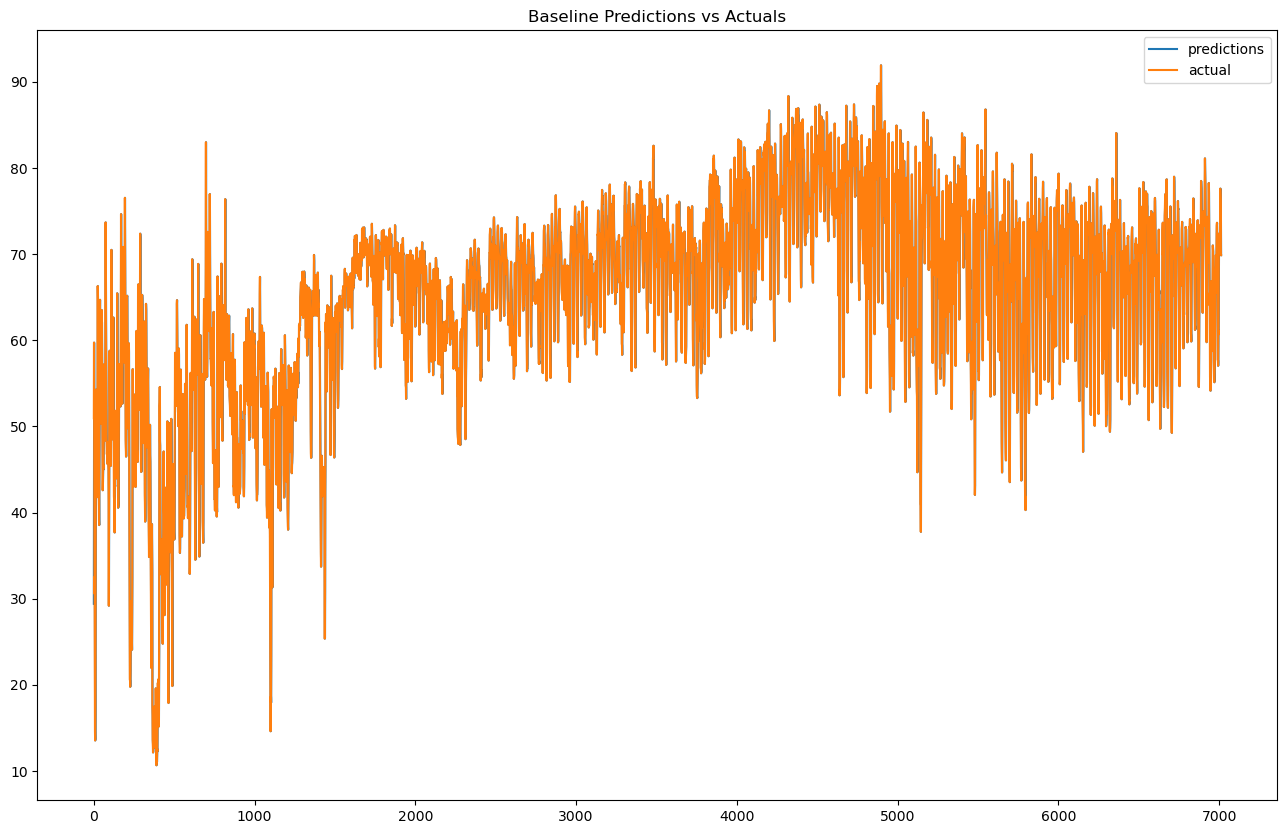

In [10]:
plt.figure(figsize=(16, 10))
plt.plot(predictions, label="predictions")
plt.plot(test, label="actual")
plt.legend()
plt.title("Baseline Predictions vs Actuals")
plt.show()

### Best Regressor from the Modeling Phase

467/467 [==============================] - 4s 5ms/step


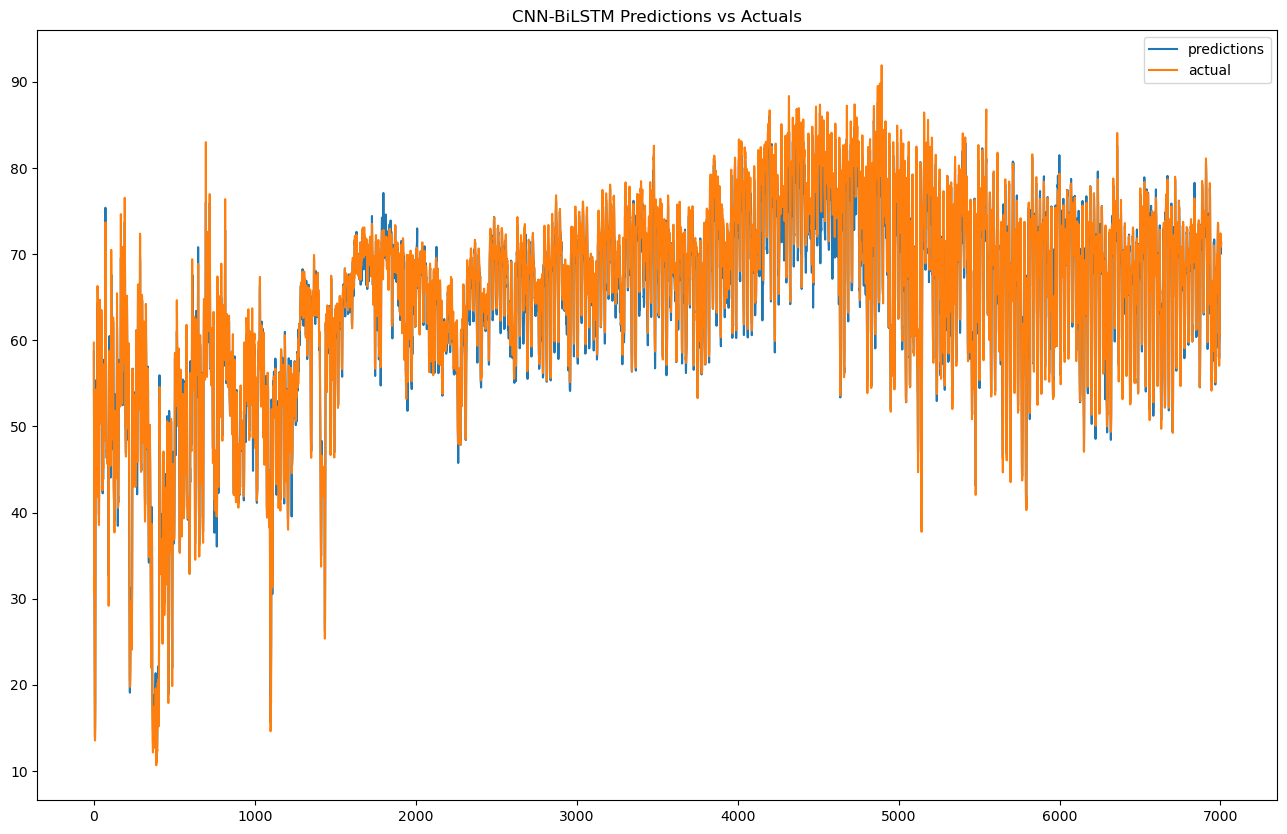

In [16]:
# instantiate deepL class
deepL = deeplearning_build.deepL()

# Load model 
deepL.load_model(model_name="CNN-BiLSTM") 

# Evaluate model
mae, mse, rmse, r2, plt = deepL.evaluate("CNN-BiLSTM", df_test, plt_pred=True)

In [17]:
# Print results
print("Results for BiLSTM model on test set:")
print("MAE: %0.2f" % mae)
print("MSE: %0.2f" % mse)
print("RMSE: %0.2f" % rmse)
print("R2: %0.2f" % r2)

Results for BiLSTM model on test set:
MAE: 1.05
MSE: 2.27
RMSE: 1.51
R2: 0.98


- Hybrid CNN-BiLSTM surpases the baseline model in all regression metrics